# Predicting heart disease using machine learning 

This notebook looks into using various python-based machine learning libraries in an attempt to building a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We are going to take the following approach :

1. Problem Definition 
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definiftion

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI machine learning repository.
https://archive.ics.uci.edu/ml/datasets/heart+disease

There is also version of it available on kaggle https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has a heart disease during the proof of concept, we will pursue the project.

## 4. Features

1. age - age in years
2. sex - (1 : male, 0 : female)
3. cp - chest pain type (4 values)
    - 0: typical angina
    - 1: atypical angina
    - 2: non-anginal pain
    - 3: asymptomatic
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
5. chol - serum cholestoral in mg/dl
    - serum = LDL + HDL + 0.2 * triglycerides 
    - above 200 is cause for concern
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

## Preparing tools

We're going to use Numpy, Pandas and Matplotlib libraries for the data analysis and manipulation.

In [1]:
# Import all needed tools

# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve

In [2]:
df = pd.read_csv('heart_disease.csv')
df.shape

(303, 14)

## Exploratory data analysis (EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset we're working on.

1. What are questions we're trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do we deal with?
4. Where are outliers and why should we care about them?
5. How can we add, remove and change features to get more out of our data?

**Note : This is not an exhaustive list**

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Target values from each class
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

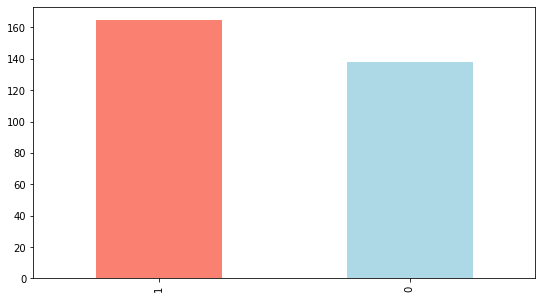

In [6]:
# Plot Target values from each class
df.target.value_counts().plot(kind='bar', color=['salmon', 'lightblue'], figsize=(9, 5));

In [7]:
# Get data Info's
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [8]:
# Verify missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Compare the target feature by sex

In [10]:
# Compare the target feature by sex
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


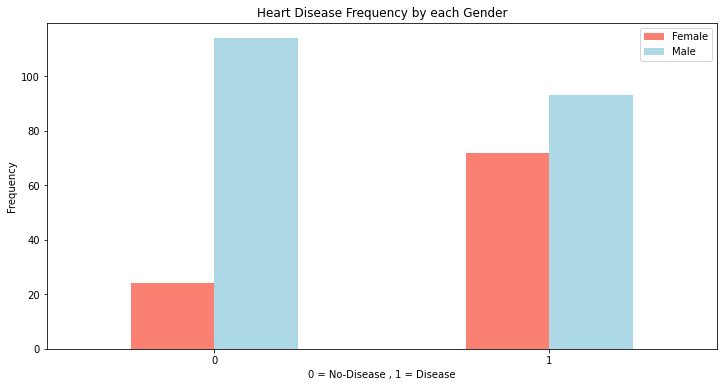

In [11]:
# Plot the previous comparison
pd.crosstab(df.target, df.sex).plot(kind='bar', color=['salmon', 'lightblue'], figsize=(12, 6))
plt.xlabel('0 = No-Disease , 1 = Disease')
plt.ylabel('Frequency')
plt.title('Heart Disease Frequency by each Gender')
plt.xticks(rotation=0)
plt.legend(['Female', 'Male']);

### Age vs. Max heart rate 'thalach' for Heart disease

''

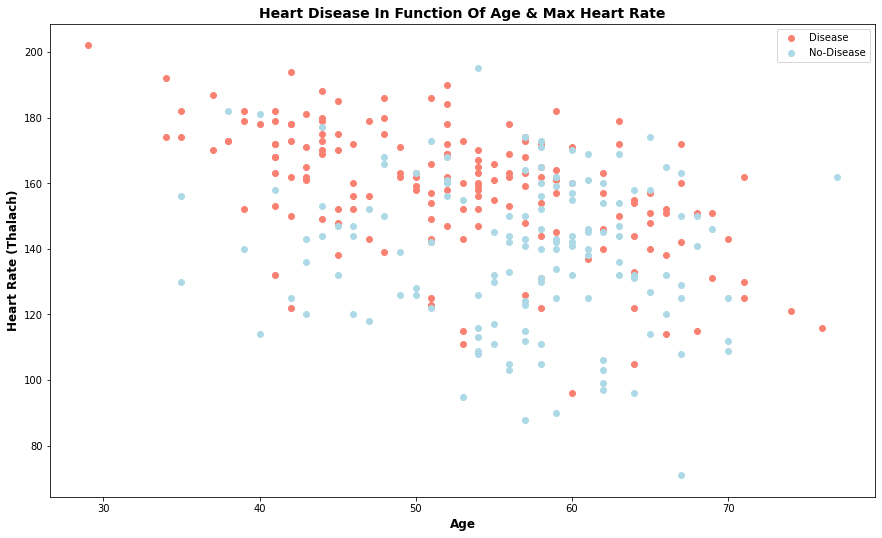

In [12]:
plt.subplots(figsize=(14.78, 8.7))
# Plot positive points
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c='salmon')
# Plot negative points
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c='lightblue')
plt.legend(['Disease', 'No-Disease'])
plt.xlabel('Age'.title(), fontsize=12, weight='bold')
plt.ylabel('Heart Rate (Thalach)'.title(), fontsize=12, weight='bold')
plt.title('Heart Disease in function of Age & Max Heart Rate'.title(), fontsize=14, weight='bold')
;

### Check the distribution of the age column 

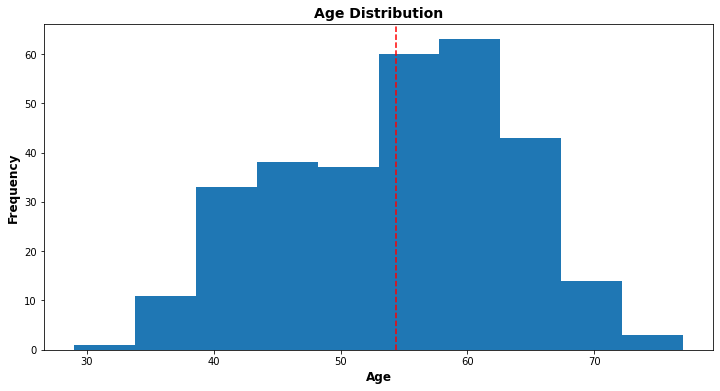

In [13]:
plt.subplots(figsize=(12, 6))
plt.hist(df.age)
plt.xlabel('Age'.title(), fontsize=12, weight='bold')
plt.ylabel('Frequency'.title(), fontsize=12, weight='bold')
plt.title('Age Distribution'.title(), fontsize=14, weight='bold')
plt.axvline(df.age.mean(), ls='--', color='r');

### Heart disease frequency by chest pain type 'cp'

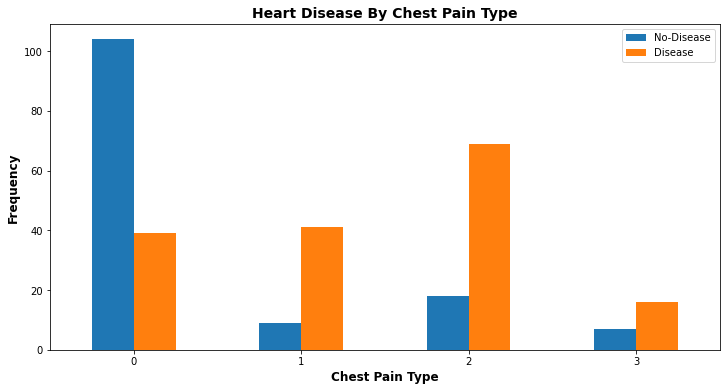

In [14]:
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(12, 6))
plt.xlabel('Chest Pain Type'.title(), fontsize=12, weight='bold')
plt.xticks(rotation=0)
plt.ylabel('Frequency'.title(), fontsize=12, weight='bold')
plt.title('Heart Disease by Chest Pain Type'.title(), fontsize=14, weight='bold')
plt.legend(['No-Disease', 'Disease']);

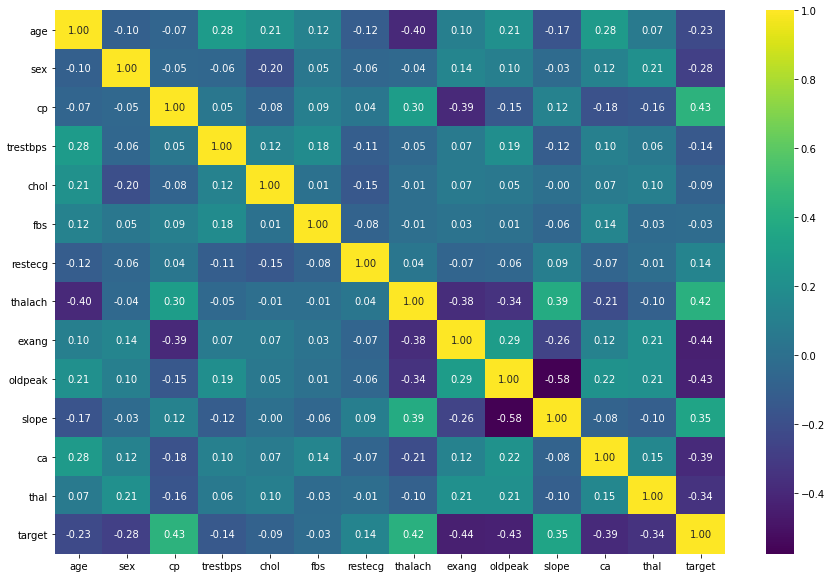

In [15]:
# Make a correlation matrix for the whole dataframe
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='0.2f');

## 5. Modelling

In [16]:
# Create Data : X and y sets
X = df.drop('target', axis=1)
y = df['target']

In [17]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**We have got our data split into train and test sets it's time to build our machine learning model**

* We will train it (find out patterns) on the train set.
* Then test it (Use the patterns) on the test set.

We're going to try three different ML models :
1. Logistic regression
2. KNeighborsClassifier
3. RandomForestClassifier

In [18]:
# Put models in a dictionarie
models = {'Logistic Regression':LogisticRegression(),
          'KNeighbors Classifier':KNeighborsClassifier(),
          'Random Forest Classifier':RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluate given machine learning models
    - models : a dict of different sklearn ML models.
    - X_train : training data (without labels)
    - X_test : testing data (without labels)
    - y_train : training data (labels)
    - y_test : test data (labels)
    """
    # Set a random seed
    np.random.seed(42)
    # Make dictionary to keep the models scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)
        # Evaluate the model and append its scores('accuracy') to model_scores
        model_scores[name] = model.score(X_test, y_test)    
    return model_scores   

In [19]:
# I had got stuck for along one day in this line of code to ultimately realize that I need to upgrade scikit-learn, oof!! 
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

c:\users\bhc\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8360655737704918,
 'KNeighbors Classifier': 0.6885245901639344,
 'Random Forest Classifier': 0.8032786885245902}

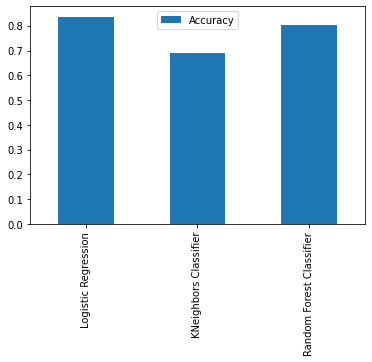

In [20]:
# Compare accuracy from each model score
model_comparaison = pd.DataFrame(model_scores, index=['Accuracy'])
model_comparaison.T.plot(kind='bar'); # T stands for transpose ==> to get separated bars

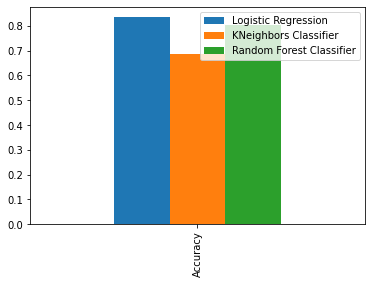

In [21]:
# Compare without transposing the dataframe
model_comparaison.plot(kind='bar');
#Hardly interpreatable!!

Now we have got a baseline model, and we know that first model's predictions are not what we should based our next steps off. So what's next?

Let's look at the at the following :

* Hyperparamter tuning (by Hand)
* Feature importance
* Confusion matrix
* Cross validation
* Precision
* Recall
* F1
* Classification report
* ROC curve
* Are under curve (RUC)

## Hyperparamter tuning (by Hand)

In [22]:
# Let's tune Knn
# On the whole here we will create 20 models and then append both train & test scores to the lists below

# Create the scores lists
train_scores=[]
test_scores=[]

# Create a list of different values in KNeighbors
neighbors = range(1, 21)

#Setup Knn instance
knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the train scores list
    train_scores.append(knn.score(X_train, y_train))
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [23]:
train_scores

[1.0,
 0.8099173553719008,
 0.8140495867768595,
 0.7851239669421488,
 0.7933884297520661,
 0.78099173553719,
 0.7520661157024794,
 0.743801652892562,
 0.7355371900826446,
 0.731404958677686,
 0.7148760330578512,
 0.7148760330578512,
 0.7148760330578512,
 0.6942148760330579,
 0.6900826446280992,
 0.6900826446280992,
 0.6818181818181818,
 0.6983471074380165,
 0.7231404958677686,
 0.7066115702479339]

In [24]:
test_scores

[0.5573770491803278,
 0.6557377049180327,
 0.6721311475409836,
 0.6229508196721312,
 0.6885245901639344,
 0.6557377049180327,
 0.6885245901639344,
 0.6885245901639344,
 0.6721311475409836,
 0.6885245901639344,
 0.639344262295082,
 0.6557377049180327,
 0.639344262295082,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6885245901639344,
 0.6885245901639344,
 0.6885245901639344]

Max KNN Score On the Test Data: 68.85%


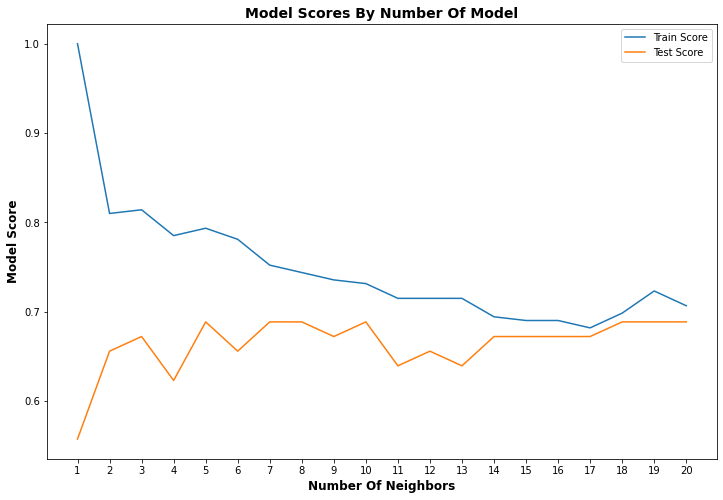

In [25]:
# Plot the tuning results
plt.subplots(figsize=(12, 8))
plt.plot(neighbors, train_scores, label='Train Score')
plt.plot(neighbors, test_scores, label='Test Score')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of Neighbors'.title(), fontsize=12, weight='bold')
plt.ylabel('Model Score'.title(), fontsize=12, weight='bold')
plt.title('Model Scores by Number of Model'.title(), fontsize=14, weight='bold')
plt.legend();

print(f'Max KNN Score On the Test Data:{np.max(test_scores) * 100 : 0.2f}%')

### Hyperparameter Tuning with RandomizedSearchCV

We are going to tune 
- LogisticRegression
- RandomForestClassifier
Using RandomizedSearchCV

In [26]:
# Create a Hyperparameter grid for LogisticRegression
log_reg_grid = {'C' : np.logspace(-4, 4 , 20),
                'solver' : ['liblinear']}

# Create a Hyperparameter grid for RandomForestClassifier
clf_grid = {'n_estimators' : np.arange(10, 1000, 50),
           'max_depth' : [None, 5, 10],
           'min_samples_split' : np.arange(2, 20, 2),
           'min_samples_leaf' : np.arange(1, 20, 2)}

In [27]:
# Set up a random seed
np.random.seed(42)

# Set up random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                n_iter = 20,
                                verbose = True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [28]:
# Find the best hyperparameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [29]:
# Evaluate the randomized search LogisticRegression model
rs_log_reg.score(X_test, y_test)

0.8360655737704918

LogisticRegression original model has an accuracy score of 0.83 which is less than the accuracy score after tuning the model and get the best params.

* Now we have tuned the LogisticRegression model, let's do the same for the RandomForestClassifier

In [30]:
# Set up a random seed
np.random.seed(42)

# Set up random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions = clf_grid,
                                n_iter = 20,
                                verbose = True)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [31]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 2,
 'min_samples_leaf': 19,
 'max_depth': 10}

In [32]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.819672131147541

The original score of the RandomForestClassifier is about 0.868.

### Hyperparameter Tuning with GridSearchCV

In [33]:
# Set the logisticRegression grid
log_reg_grid = {'C' : np.logspace(-4, 4, 30),
                'solver' : ['liblinear']}

# Set up grid hyperparameters search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv = 5,
                          verbose = True)

# Fit the grid hyperpramaters search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [34]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [35]:
# Evaluate the grid search logistic regression model
gs_log_reg.score(X_test, y_test)

0.8360655737704918

### Evaluating our tuned machine learning classifier beyond accuracy

- ROC curve and AUC score.
- Confusion matrix.
- Classification report.
- Percsion.
- Recall.
- F1.

It would be great if cross-validation was used where it is possible.
To make comparaisons on our trained model we must first make predictions.

In [36]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

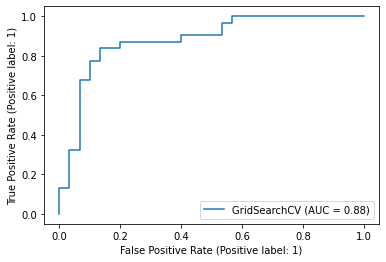

In [37]:
# Plot ROC curve and calculate roc metric
plot_roc_curve(gs_log_reg, X_test, y_test);

In [38]:
# Confusion matrix
confusion_matrix(y_test, y_preds)

array([[27,  3],
       [ 7, 24]], dtype=int64)

In [39]:
# Get the confusion matrix with pd.crosstab
pd.crosstab(y_test, y_preds,
            rownames=['Actual labels'],
            colnames=['Predcited labels'])

Predcited labels,0,1
Actual labels,,
0,27,3
1,7,24


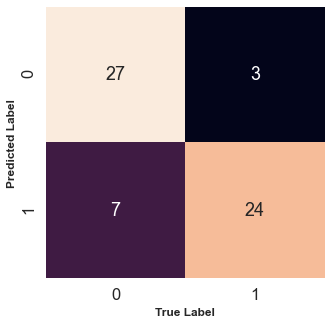

In [40]:
# Plot confusion matrix with seaborn heat map
# Set a seaborn font scale
sns.set(font_scale = 1.5)

# plot the confusion matrix
def plot_conf_mat(y_test, y_preds):
    """Plot a nice looking confusion matrix using seaborn's heat map"""
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)
    plt.xlabel('True Label'.title(), fontsize=12, weight='bold')
    plt.ylabel('Predicted Label'.title(), fontsize=12, weight='bold')
    plt.show()
    
plot_conf_mat(y_test, y_preds);

Now we have got `ROC curve`, an `AUC` metric and `confusion matrix`, let's get a `classification report` as well as `cross_validated` `precision`, `recall`, `f1-score`. 

In [41]:
print(classification_report(y_test, y_preds))
# This classification report is done on just one set of data(train, test) and not cross-validated 

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        30
           1       0.89      0.77      0.83        31

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



### Calculate evaluation metrics using cross validation

We are going to calculate `accuracy`, `precision`, `recall` and `f1-score` of our model by using cross validation `cross_val_score()`.

In [42]:
# Check the best hyperparameters 
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [43]:
# Create a new classifier with best paramaters 
clf = LogisticRegression(C = 0.1082636733874054, solver = 'liblinear')

In [44]:
# Cross-validated accuracy (scoring = 'accuracy')
cv_acc = cross_val_score(clf, X, y, cv=5, scoring = 'accuracy')

cv_acc = np.mean(cv_acc)
print(f'The cross validated accuray is : {cv_acc * 100 : .2f}%')

The cross validated accuray is :  83.48%


In [45]:
# Cross-validated precision (scoring = 'precision')
cv_precision = cross_val_score(clf, X, y, cv=5, scoring='precision')

cv_precision = np.mean(cv_precision)
print(f'The cross validated precison score is : {cv_precision * 100 : .2f}%')

The cross validated precison score is :  81.83%


In [46]:
# Cross-validated recall (scoring = 'recall')
cv_recall = cross_val_score(clf, X, y, cv=5, scoring='recall')

cv_recall = np.mean(cv_recall)
print(f'The cross validated recall score is : {cv_recall * 100 : .2f}%')

The cross validated recall score is :  90.30%


In [47]:
# Cross-validated F1 (scoring = 'f1')
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring='f1')

cv_f1 = np.mean(cv_f1)
print(f'The cross validated F1 score is : {cv_f1 * 100 : .2f}%')

The cross validated F1 score is :  85.73%


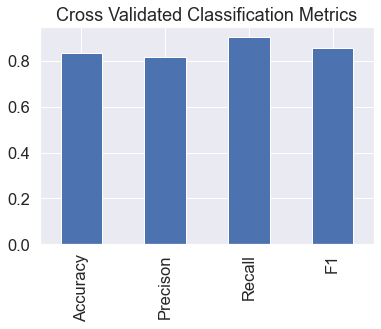

In [48]:
# Visualize cross validated metrics 
cv_metrics = pd.DataFrame({'Accuracy' : cv_acc,
                           'Precison' : cv_precision,
                           'Recall' : cv_recall,
                           'F1' : cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title='Cross Validated Classification Metrics', legend=False);

### Feature importance 

Feature importance is another as asking 'which features contributed most to the outcomes of the model and how did they contribute?

Finding feature importance is different for each machine learning model. One way to find feature importance is to search 'Model Name feature importance'.

Let's find the feature importance for our LogisticRegression Model.

In [49]:
# Fit an instance of LogisticRegression
gs_log_reg.best_params_
clf = LogisticRegression(C = 0.38566204211634725, solver = 'liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=0.38566204211634725, solver='liblinear')

In [50]:
# Check attributes Coefficients on predicting heart disease
clf.coef_

array([[ 0.01399667, -1.17226785,  0.86221919, -0.02191963, -0.00311021,
         0.06118061,  0.27423803,  0.03094787, -0.53497781, -0.62503785,
         0.43130742, -0.7260484 , -0.60178853]])

In [51]:
list(clf.coef_[0])

[0.013996665055496918,
 -1.1722678531804487,
 0.8622191877836313,
 -0.02191962847180423,
 -0.0031102103715966167,
 0.061180611989158876,
 0.274238027076247,
 0.03094787145603896,
 -0.5349778057457105,
 -0.6250378481828684,
 0.43130741799395755,
 -0.726048396755303,
 -0.6017885290980676]

In [52]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.013996665055496918,
 'sex': -1.1722678531804487,
 'cp': 0.8622191877836313,
 'trestbps': -0.02191962847180423,
 'chol': -0.0031102103715966167,
 'fbs': 0.061180611989158876,
 'restecg': 0.274238027076247,
 'thalach': 0.03094787145603896,
 'exang': -0.5349778057457105,
 'oldpeak': -0.6250378481828684,
 'slope': 0.43130741799395755,
 'ca': -0.726048396755303,
 'thal': -0.6017885290980676}

In [56]:
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.013997,-1.172268,0.862219,-0.02192,-0.00311,0.061181,0.274238,0.030948,-0.534978,-0.625038,0.431307,-0.726048,-0.601789


<AxesSubplot:title={'center':'Features importance of LogisitciRegression'}>

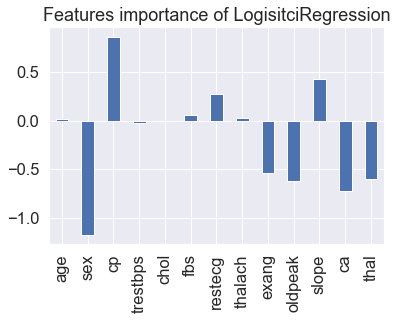

In [53]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Features importance of LogisitciRegression', legend=False)

In [54]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [55]:
pd.crosstab(df['slope'], df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## Experimentation

**More on evaluation metrics...**
- Could we collect more data?
- Could you try a better model? like CatBoost, XGBoost.
- Could you improve the current models(beyon what we done so far).
- If your model is good enough(you have hit your evaluation metric), how would you export it and share it with others? 